## Import libraries and load data
This cell loads a dataset and displays its contents

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import image
import matplotlib.patches as patches
import scipy.ndimage as ndimage
import yaml
import json

file_path = "/home/ducanor/arenav2_ws/src/utils/arena-evaluation/02_evaluation/record01.csv" # specify file path to data for plotting
assert os.path.exists(file_path), "File path invalid: {0}".format(file_path)
assert file_path.endswith(".csv"), "Specified file is not a .csv file: {0}".format(file_path)
data = pd.read_csv(file_path, index_col = 0)

print("Columns of the dataframe:")
print(list(data.columns))

print("The following shows which planners were evaluated on which robot, map, and scenario:")
print(np.unique(["---".join(row) for index, row in data[["planner","model","map","scenario"]].iterrows()]))

# from IPython.display import display
# display(data) # display pd dataframe

Columns of the dataframe:
['episode', 'time', 'collision', 'min_clearing_distance', 'normalized_curvature', 'roughness', 'jerk', 'path_length', 'success', 'done_reason', 'angle_over_length', 'planner', 'model', 'map', 'scenario', 'paths_traveled']
The following shows which planners were evaluated on which robot, map, and scenario:
['a3c---burger---map1---map1_obs00'
 'a3c---burger---map_empty---empty_map_obs00'
 'a3c---burger---map_empty---empty_map_obs05'
 'ppo---burger---map1---map1_obs00'
 'ppo---burger---map_empty---empty_map_obs00'
 'ppo---burger---map_empty---empty_map_obs05'
 'teb---burger---map1---map1_obs00'
 'teb---burger---map_empty---empty_map_obs00'
 'teb---burger---map_empty---empty_map_obs05']


## Barplots to compare average planner performance
Barplots can be used to directly compare the average planner performance across the scenarios

Text(0.5, 0.98, 'Time traveled')

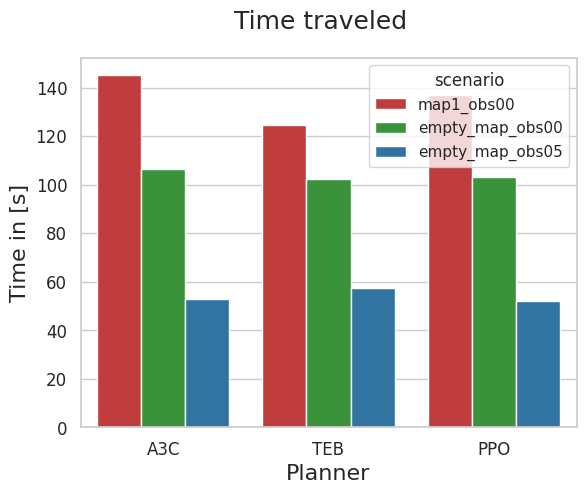

In [6]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots()

### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
# subset = subset[subset["model"]=="burger"]
# subset = subset[subset["map"]=="map1"]
# subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

### color scheme
color_scheme = { # if hue is used, dictionary has to be defined for hue values
    "empty_map_obs00":"tab:green",
    "empty_map_obs05":"tab:blue",
    "map1_obs00":"tab:red",
    "dwa": "tab:orange",
    "teb": "tab:red"
}

### planner labels
planner_labels = {
    "a3c":"A3C",
    "teb":"TEB",
    "ppo":"PPO"
}

### drawing bar plots, please refer to https://seaborn.pydata.org/generated/seaborn.barplot.html for further information
ax = sns.barplot(x="planner", y="time", hue="scenario", palette=color_scheme, ci=None, data=subset) # use ci="sd" to plot standard deviation as error bars, ci=None to omit
ax.set_ylabel("Time in [s]", fontsize=16)
ax.set_xlabel("Planner", fontsize=16)
ax.set_xticklabels([planner_labels[x.get_text()] for x in ax.get_xticklabels()], fontsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.suptitle("Time traveled", fontsize=18)
# plt.title("", fontsize=12)

## Lineplots to compare planner performance across episodes
Lineplots show a more detailed view of the planner performance across the episodes

Text(0.5, 1.0, 'Map: map1 Scenario: obstacle_map1_obs05')

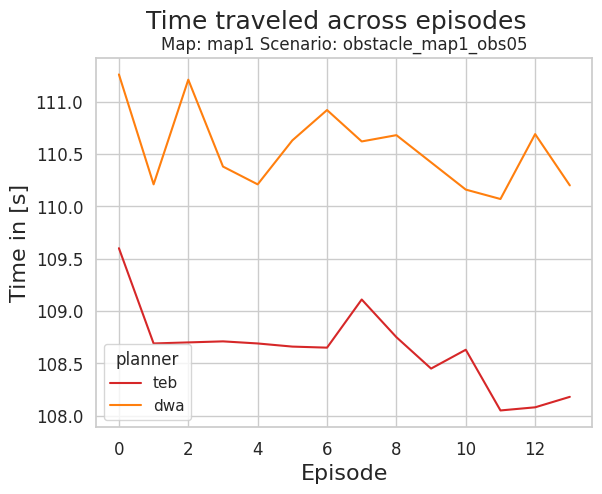

In [4]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots()

### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
subset = subset[subset["model"]=="burger"]
subset = subset[subset["map"]=="map1"]
subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

### color scheme
color_scheme = { # if hue is used, dictionary has to be defined for hue values
    "obstacle_map1_obs05":"tab:green",
    "obstacle_map1_obs10":"tab:blue",
    "dwa": "tab:orange",
    "teb": "tab:red"
}

### planner labels
planner_labels = {
    "dwa":"DWA",
    "teb":"TEB"
}

### drawing line plots, please refer to https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot for further information
ax = sns.lineplot(x="episode", y="time", hue="planner", palette=color_scheme, ci=None, data=subset) # use ci="sd" to plot standard deviation as error bars, ci=None to omit
ax.set_ylabel("Time in [s]", fontsize=16)
ax.set_xlabel("Episode", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.suptitle("Time traveled across episodes", fontsize=18)
plt.title("Map: map1 Scenario: obstacle_map1_obs05", fontsize=12)

## Piecharts to compare success and failure rates
Piecharts show the fractions of successful and unsuccessful episodes as well as the type of failures

Text(0.5, 0.98, 'Success and Failure Rates')

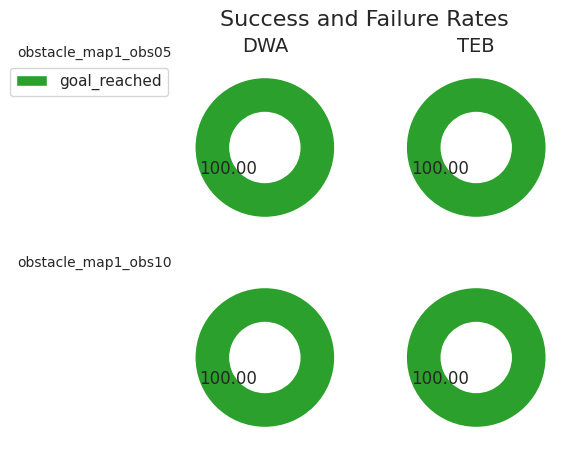

In [5]:
### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
subset = subset[subset["model"]=="burger"]
subset = subset[subset["map"]=="map1"]
# subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

grouped_subset = subset.groupby(["scenario","planner","done_reason"]).size()

scenarios = np.unique(subset.scenario)
planners = np.unique(subset.planner)
nrows = len(scenarios)
ncols = len(planners)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(5,5))

### color list for done reasons
colors = [
    "tab:green",
    "tab:blue",
    "tab:red"
]

### planner labels
planner_labels = {
    "dwa":"DWA",
    "teb":"TEB"
}


### draw multiple pie plots (donut plots with wedgeprops), for further information https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
for row,scene in enumerate(scenarios):
    for col,planner in enumerate(planners):
        axes[row,col].pie(grouped_subset.loc[(scene,planner),],
            autopct='%.2f', 
            wedgeprops=dict(width=.5), # donut property, omit for regular pie chart
            colors=colors,
            startangle=30)
        if row==0:
            axes[row,col].set_title(planner_labels[planner], fontsize=14)
        if col==0:
            axes[row,col].set_ylabel(scene, fontsize=10, loc="top", rotation="horizontal")
        if row==0 and col==0: # display legend only in axes[0,0]
            axes[row,col].legend(list(grouped_subset.loc[(scene,planner),].index), 
                bbox_to_anchor=(-1,1), # legend position
                loc="upper left",
                ncol=1,
                fancybox=True)
fig.suptitle('Success and Failure Rates', size=16)

## Qualitative plots
Qualitative plots display the trajectories of the robot in each episode of the scenario as well as the scenario setup

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


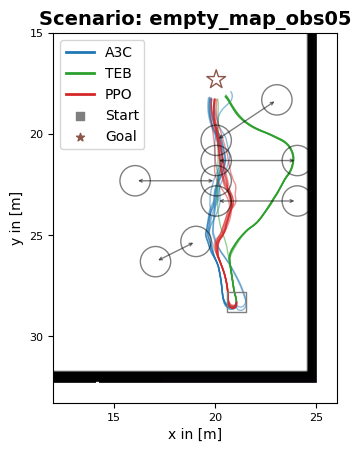

In [74]:
arena_simulation_setup_path = "/home/ducanor/arenav2_ws/src/utils/arena-evaluation/03_plotting/plotting_setup"
assert os.path.isdir(arena_simulation_setup_path), "Directory path invalid: {0}".format(arena_simulation_setup_path)

### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
subset = subset[subset["model"]=="burger"]
subset = subset[subset["map"]=="map_empty"]
subset = subset[subset["scenario"]=="empty_map_obs05"]

### additional functions
# x,y coordinate transformations needed for qualitative plots
def to_ros_coords(coords, img, map_resolution, map_origin):
    if type(coords) == tuple:
        return  [img.shape[0] - (y-map_origin[1])/map_resolution for x,y in coords],[img.shape[1] - (x-map_origin[0])/map_resolution for x,y in coords]
    elif type(coords) == list and (type(coords[0]) == float or type(coords[0]) == int):
        return  img.shape[0] - (coords[1]-map_origin[1])/map_resolution,img.shape[1] - (coords[0]-map_origin[0])/map_resolution
    elif type(coords) == list:
        return  [img.shape[0] - (point[1]-map_origin[1]) / map_resolution for point in coords],[img.shape[1] - (point[0]-map_origin[0]) / map_resolution for point in coords]

def transform_waypoints(obstacle_paths, img, map_resolution, map_origin, ped_sim = False): # only necessary for old scenario.json
    transformed_paths = []
    if ped_sim:
        for path in obstacle_paths:
            transformed_paths.append([list(to_ros_coords(p,img, map_resolution, map_origin)) for p in path])
    else:
        for path in obstacle_paths:
            start = list(to_ros_coords(path[0],img, map_resolution, map_origin))
            waypoint = list(to_ros_coords((np.array(path[0]) + np.array(path[1])).tolist(),img, map_resolution, map_origin))
            transformed_paths.append([start,waypoint])
    return transformed_paths

### color scheme for planners
color_scheme = {
    "a3c":"tab:blue",
    "teb":"tab:green",
    "ppo":"tab:red"
}

### planner labels
planner_labels = {
    "a3c":"A3C",
    "teb":"TEB",
    "ppo":"PPO"
}

### plotting part ###
fig, ax = plt.subplots()

# plot map image
map_name = np.unique(subset["map"])[0]
assert len(np.unique(subset["map"]))==1, "More than 1 map has been found in the subset. Please specify the map!"

with open("{0}/maps/{1}/map.yaml".format(arena_simulation_setup_path,map_name)) as file: # get map file from map.yaml in map directory
    map_yaml = yaml.safe_load(file)
    map_file = map_yaml["image"]
    map_resolution = map_yaml["resolution"]
    map_origin = map_yaml["origin"]

img= image.imread("{0}/maps/{1}/{2}".format(arena_simulation_setup_path,map_name,map_file))
img_rotated = ndimage.rotate(img, 90, reshape=True) # rotate by 90 degree to get rviz konvention
ax.imshow(img_rotated, cmap="gray")

# plot trajectories
for i,row in subset.iterrows():
    x,y = to_ros_coords(eval(row["paths_traveled"]), img, map_resolution, map_origin)
    if row["episode"]==1:
        plt.plot([],[], # plot legend only with empty lines
        "-",
        label = planner_labels[row["planner"]],
        color = color_scheme[row["planner"]],
        linewidth = 2)
    plt.plot(x,y, # plot trajectories
    "-",
    color = color_scheme[row["planner"]],
    alpha = 0.5,
    linewidth = 1)

    if False: # set to True to plot progression, else set to False
        progression_step_size = 50
        progression_size = 5
        x_progression = x[0::progression_step_size]
        y_progression = y[0::progression_step_size]
        plt.scatter(x_progression,y_progression,
        color = color_scheme[row["planner"]],
        alpha = 0.5,
        s = progression_size)

# plot scenario properties
scenario_name = np.unique(subset["scenario"])[0]
assert len(np.unique(subset["scenario"]))==1, "More than 1 scenario has been found in the subset. Please specify the scenario!"

with open("{0}/scenarios/{1}.json".format(arena_simulation_setup_path,scenario_name)) as file: # get map file from map.yaml in map directory
    scenario = json.load(file)

if "pedsim_agents" in scenario.keys():
    dynamic_obstacles = scenario["pedsim_agents"]
    obstacle_paths = [[obstacle["pos"]]+ obstacle["waypoints"] for obstacle in dynamic_obstacles]
    start_x, start_y = to_ros_coords(scenario["robot_position"], img, map_resolution, map_origin)
    goal_x, goal_y = to_ros_coords(scenario["robot_goal"], img, map_resolution, map_origin)
    obstacle_paths = transform_waypoints(obstacle_paths, img, map_resolution, map_origin, ped_sim=True)
else:
    start = scenario["scenarios"][0]["robot"]["start_pos"]
    goal = scenario["scenarios"][0]["robot"]["goal_pos"]
    dynamic_obstacles = scenario["scenarios"][0]["dynamic_obstacles"]
    obstacle_paths = [[dynamic_obstacles[obstacle]["start_pos"][:-1]]+[waypoint[:-1] for waypoint in dynamic_obstacles[obstacle]["waypoints"]] for obstacle in dynamic_obstacles]
    start_x, start_y = to_ros_coords(start, img, map_resolution, map_origin)
    goal_x, goal_y = to_ros_coords(goal, img, map_resolution, map_origin)
    obstacle_paths = transform_waypoints(obstacle_paths, img, map_resolution, map_origin)

# plot start point and goal
# labels for legend only
plt.scatter([],[], marker = "s", label = "Start", color = "tab:grey")
plt.scatter([],[], marker = "*", label = "Goal", color = "tab:brown")
# start and goal point
plt.scatter(start_x,start_y, marker = "s", s = 10/map_resolution, facecolors = "none", edgecolors = "tab:grey",zorder=5)
plt.scatter(goal_x,goal_y, marker = "*", s = 10/map_resolution, facecolors = "none", edgecolors = "tab:brown",zorder=5)

# plot dynamic obstacle path
for path in obstacle_paths:
    # plot waypoints as circles
    for i,waypoint in enumerate(path):
        plt.gca().add_patch(plt.Circle(waypoint,
            radius = 0.75/map_resolution,
            color="black",
            fill=False,zorder=5, alpha = 0.5))
        if i == len(path)-1:
            continue
        plt.gca().add_patch(patches.FancyArrowPatch(waypoint, path[i+1], arrowstyle='<->', mutation_scale = 5, color = "black",zorder=5,alpha=0.5))

# plot properties like title, axes, etc.
plt.legend()
plt.title("Scenario: {0}".format(scenario_name), fontsize = 14, fontweight = "bold")
plt.xlabel("x in [m]", fontsize=10)
plt.ylabel("y in [m]", fontsize=10)

x_locs = ax.get_xticks()[1:-1]
y_locs = ax.get_yticks()[1:-1]
ax.set_xticks(x_locs)
ax.set_xticklabels([int(x*map_resolution) for x in x_locs])
ax.set_yticks(y_locs)
ax.set_yticklabels([int(y*map_resolution) for y in y_locs])
ax.tick_params(axis='both', which='major', labelsize=8)

if True: # set to True if you want to crop the image
    plt.xlim(left=12/map_resolution) # left -> lower limit, right -> upper limit
    plt.ylim(top=15/map_resolution) # top -> lower limit, bottom -> upper limit

def TODO():
    #     # plot collisions
    # if self.config["plot_collisions"]:
    #     collisions = self.data[key]["collision_zones"]["collisions"]
    #     if len(collisions) != 0:
    #         x,y = to_ros_coords(collisions, img, map_resolution, map_origin)
    #         plt.scatter(x,y,
    #             color = self.config["color_scheme"][planner],
    #             alpha = self.config["collision_alpha"],
    #             s = self.config["collision_size"]/map_resolution,zorder=2)
    # # plot collision zones and centroids
    # if self.config["plot_collision_zones"]:
    #     centroids = self.data[key]["collision_zones"]["centroids"]
    #     if len(centroids) != 0:
    #         counts = self.data[key]["collision_zones"]["counts"]
    #         x,y = to_ros_coords(centroids, img, map_resolution, map_origin)
    #         plt.scatter(x,y,
    #             color = self.config["color_scheme"][planner],
    #             alpha = self.config["collision_alpha"],
    #             s = self.config["collision_size"]/map_resolution,zorder=2)
    #         for i,centroid in enumerate(centroids):
    #             # plot circle for collision zone
    #             ax.add_patch(plt.Circle(tuple(to_ros_coords(centroid, img, map_resolution, map_origin)),
    #             radius = self.config["collision_zone_base_diameter"]*counts[i]/map_resolution,
    #             color=self.config["color_scheme"][planner],
    #             fill=False,zorder=2))
    #             # plot transparent circle as background of zone
    #             ax.add_patch(plt.Circle(tuple(to_ros_coords(centroid, img, map_resolution, map_origin)),
    #             radius = self.config["collision_zone_base_diameter"]*counts[i]/map_resolution,
    #             color=self.config["color_scheme"][planner],
    #             fill=True,
    #             alpha = self.config["collision_zone_alpha"],zorder=2))
    pass


